In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16111,-122.50,37.74,44.0,2374.0,496.0,1087.0,426.0,3.5000,NEAR OCEAN,275700.0
15022,-117.00,32.77,30.0,1802.0,401.0,776.0,386.0,2.8125,<1H OCEAN,173500.0
5577,-118.30,33.84,37.0,1241.0,226.0,621.0,255.0,4.9196,<1H OCEAN,232400.0
15972,-122.41,37.71,49.0,1852.0,429.0,1615.0,447.0,3.4950,NEAR BAY,217800.0
893,-121.95,37.54,29.0,3517.0,645.0,1724.0,585.0,4.6641,<1H OCEAN,248900.0
...,...,...,...,...,...,...,...,...,...,...
2760,-115.52,32.67,6.0,2804.0,581.0,2807.0,594.0,2.0625,INLAND,67700.0
15532,-117.14,33.18,11.0,5546.0,974.0,2300.0,970.0,3.7109,<1H OCEAN,199800.0
14989,-117.02,32.73,22.0,5201.0,865.0,3280.0,817.0,4.7952,NEAR OCEAN,141400.0
19318,-123.02,38.46,52.0,2154.0,499.0,524.0,259.0,2.0556,NEAR OCEAN,120000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

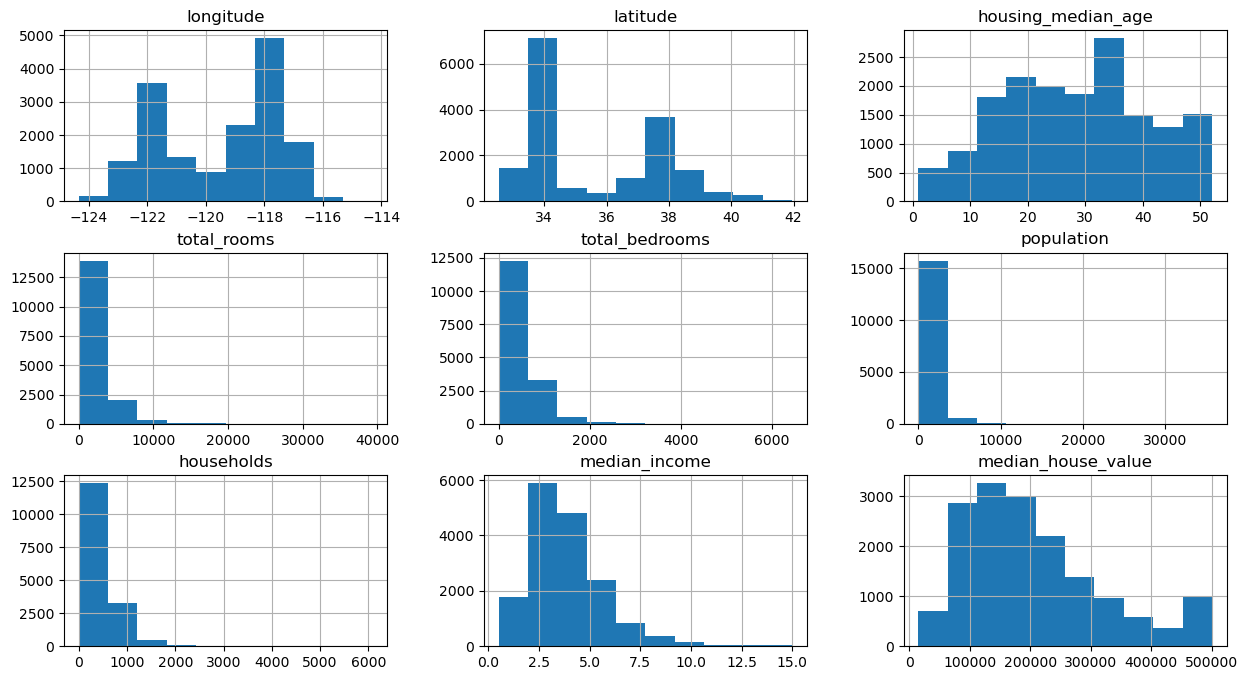

In [10]:
train_data.hist(figsize = (15, 8))

<Axes: >

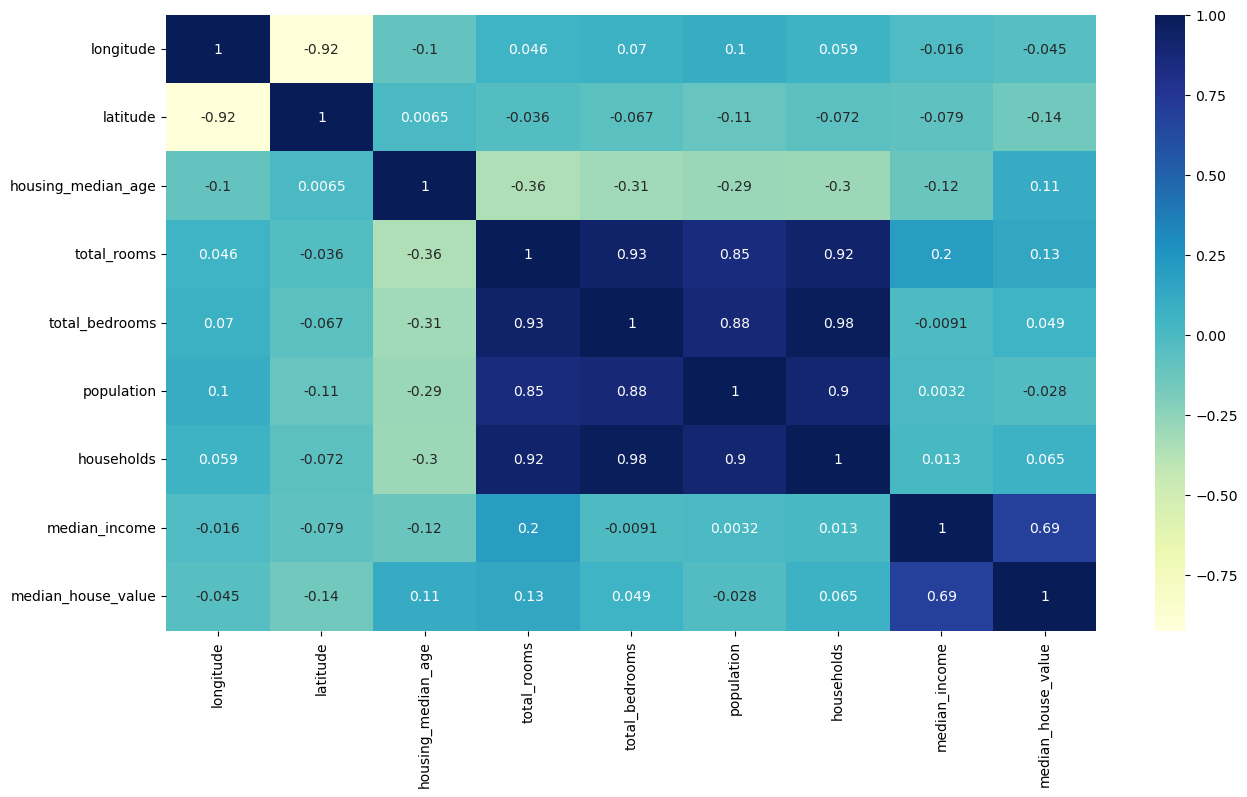

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

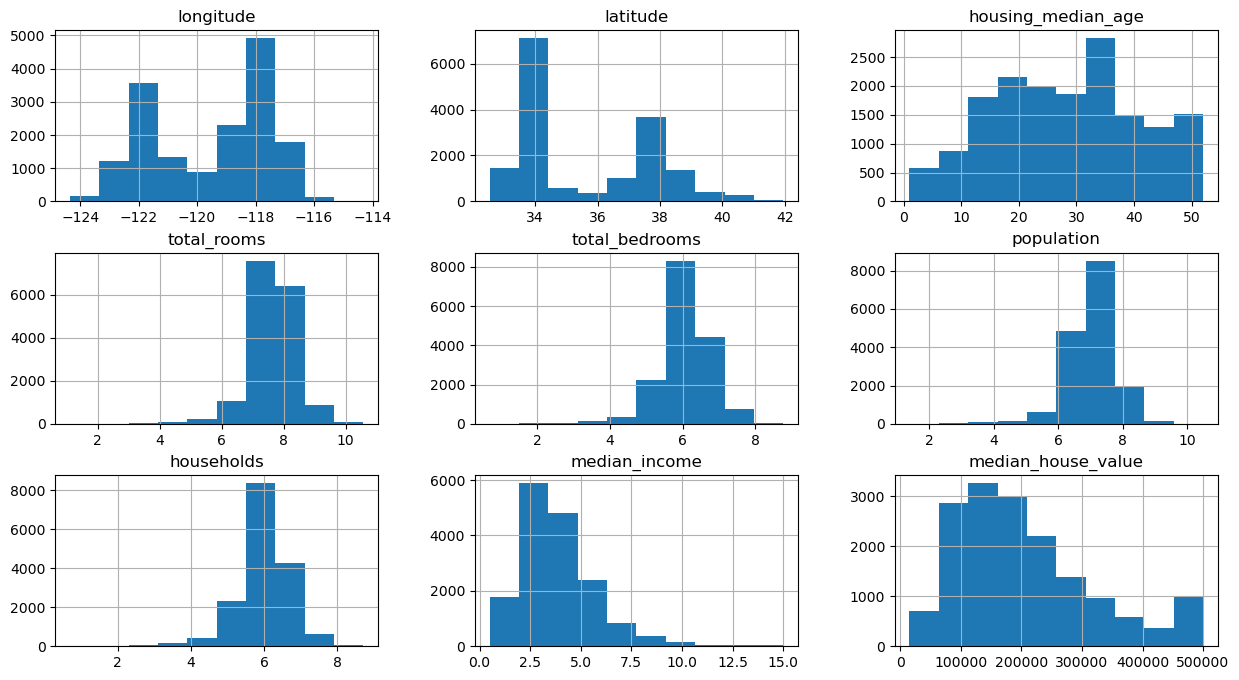

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

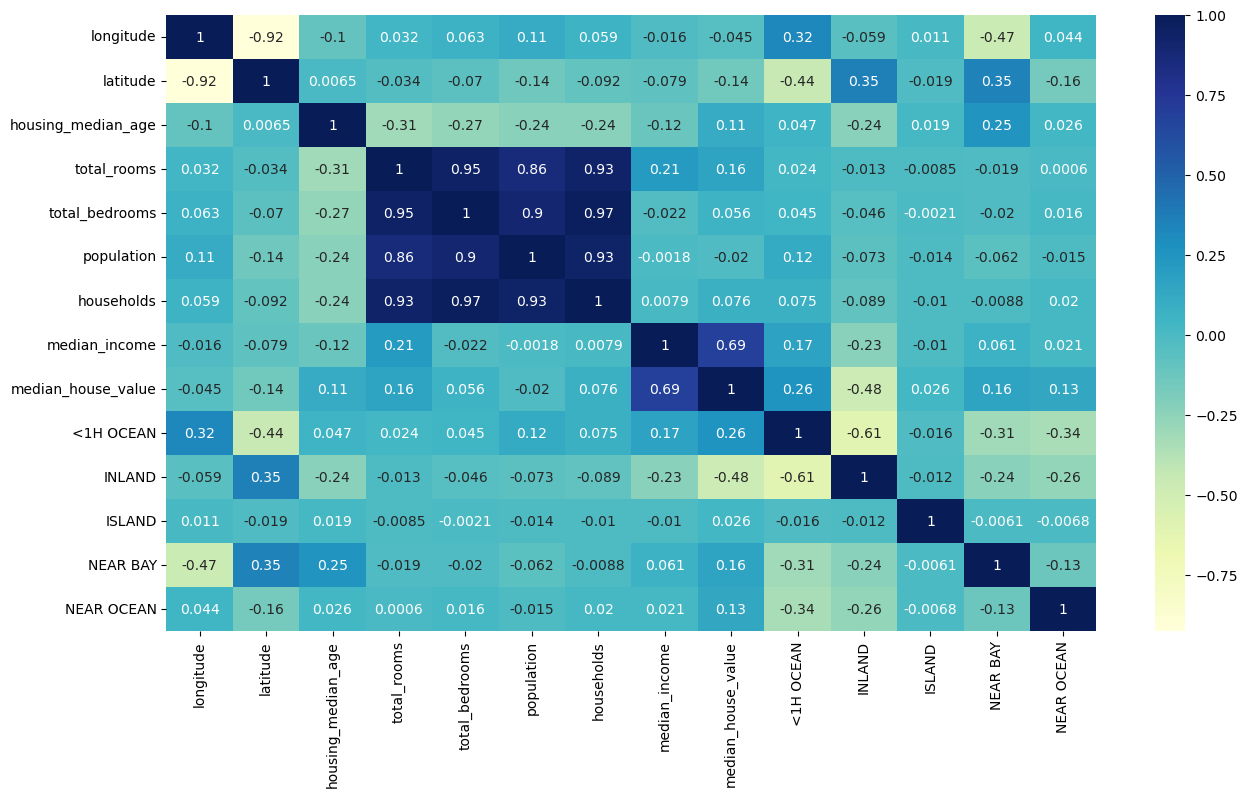

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

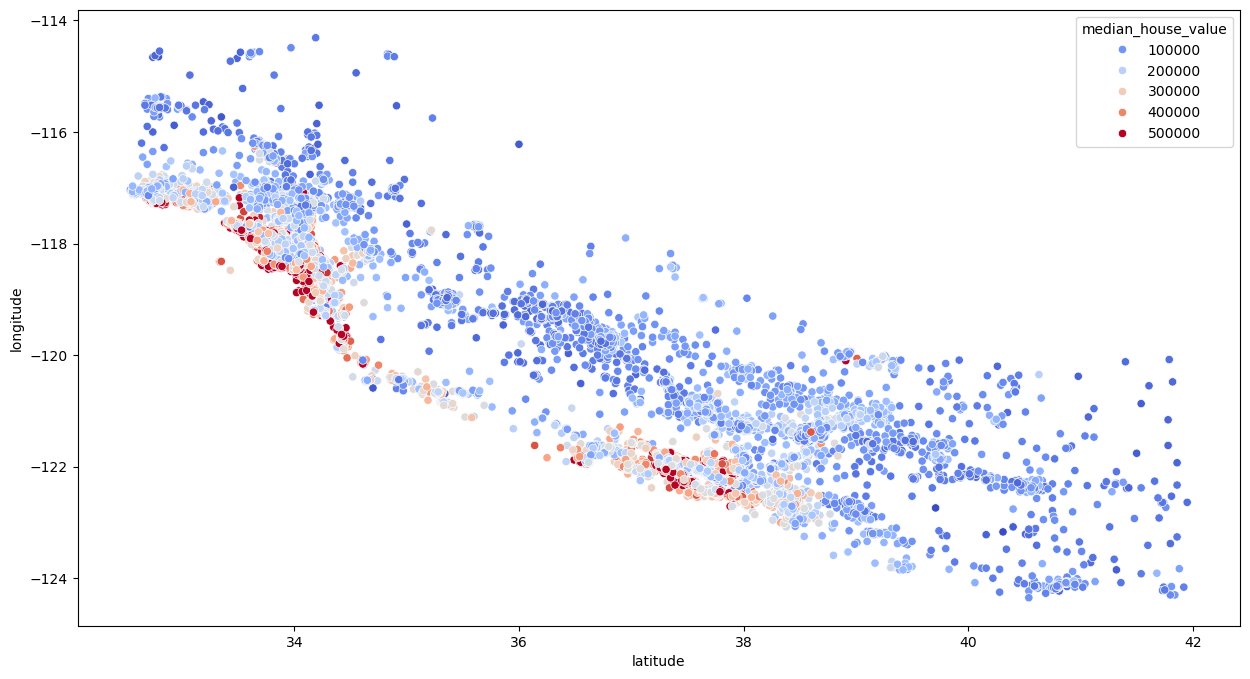

In [16]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [17]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

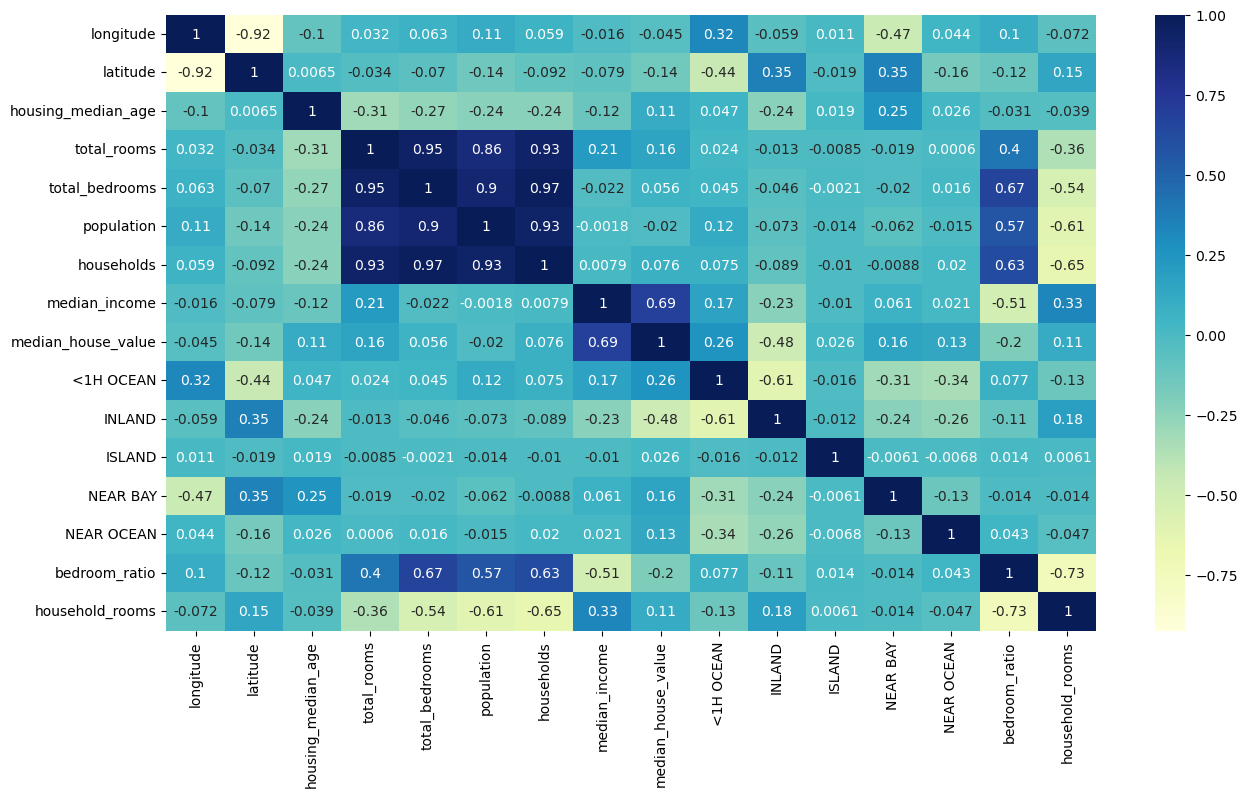

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train = X_train.drop(['ISLAND'], axis =1)
X_train_s = scaler.fit_transform(X_train)

reg=LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [20]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [21]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [22]:
X_test_s = scaler.transform(X_test)

In [23]:
X_test_s

array([[ 0.76609855, -0.49023376, -1.94995158, ..., -0.38697584,
         0.59835983, -0.43737581],
       [-0.84552983,  1.42637973, -0.91636479, ..., -0.38697584,
        -0.30723178,  0.30529822],
       [-0.87047764,  1.08595933,  1.54834218, ..., -0.38697584,
        -0.49350495,  0.28391899],
       ...,
       [ 0.68127601, -0.7980111 ,  0.83278209, ..., -0.38697584,
        -0.49541945,  0.27901407],
       [-1.27463213,  0.9647137 , -0.75735144, ..., -0.38697584,
         0.90429952, -0.65197853],
       [ 0.94572277, -0.91459343, -1.87044491, ..., -0.38697584,
         0.83131587, -0.64398104]])

In [24]:
reg.score(X_test_s, y_test)

0.664984612018036

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [26]:
forest.score(X_test_s, y_test)

0.806563599579676

In [27]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
best_forest = grid_search.best_estimator_

In [30]:
best_forest.score(X_test_s, y_test)

0.8062219054766244